# 1. Business Understanding

### 1.1. Context
- The real estate market is highly competitive, with property agents and brokers needing to provide accurate pricing and match clients with properties that best suit their needs. The availability of vast amounts of data offers an opportunity to leverage machine learning to improve decision-making, enhance client satisfaction, and optimize sales processes.

--

### 1.2. Problem Statement
- Who is the user facing the problem? 
    - The primary users are property agents and brokers who are responsible for evaluating property prices, advising clients, and closing deals in a competitive real estate market.
- What problem is the user facing?
    - Property agents and brokers often struggle to accurately estimate property prices, which can lead to overpricing or underpricing. Additionally, matching clients with suitable properties based on their preferences and budget is a challenge that requires a deep understanding of market trends and client behavior.
- Why does this problem need to be solved?
    - Accurate property pricing is critical to closing deals efficiently and maintaining client trust. Effective client-property matching increases the likelihood of successful transactions, thereby improving the agent’s reputation and profitability.

--

### 1.3. Objectives
- Develop a machine learning model that can accurately predict property prices based on historical data and current market conditions.
- Create a client matching algorithm that pairs clients with properties that best meet their needs, improving the efficiency and success rate of property transactions.
- Provide property agents with actionable insights into market trends, enabling them to set competitive prices and offer informed advice to clients.

--

### 1.4. Analytic Approach
- What solution design are you offering to solve the problem?
    - A. Type of question: Predictive (forecasting housing prices).
    - B. Type of ML algorithm: Supervised (e.g., Linear Regression, Random Forest Regressor).
- When and how will users use this solution?
    - Property agents and brokers will use the solution during the initial client consultation to provide accurate price estimates and suggest properties that meet the client’s criteria. Additionally, they can use the solution to stay informed about market trends and adjust their strategies accordingly.

--

### 1.5. Success Criteria
- What are the conditions of mis-prediction, and what are the consequences?
    - Regression:
        - Overprediction: Predicting higher property prices than the market can bear could lead to prolonged listing times or failed sales.
        - Underprediction: Predicting lower property prices might result in underselling, leading to lost revenue and client dissatisfaction.
- Explain the assumptions or research results from the data you will use.
    - The assumptions mean that old property data is still relevant for today’s market. It is also assumed that the selected features, such as location, property size, and market trends, correctly reflect what influences property prices. Before building the model, some research will be done to choose the right features and ensure the data is prepared correctly to maintain the model’s accuracy.

--

### 1.6. Project Limitation
- The project may be limited by the availability and quality of the data, especially in markets that change quickly where old data might not reflect current conditions. The model’s predictions will also be limited by the features used, which might not include all factors that affect property prices, such as unexpected economic changes or new policies.

---

# 2. Data Understanding

### 2.1. Data Source
- This data was initially featured in the following paper:
    - Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297

--

### 2.2. Data Analysis

2.2.1. Columns
- There are 10 columns in the dataset with its unique identifier and description.


| **No** | **Column Name** | **Column Description**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| 1    | longitude         | A measure of how far west a house is; a higher value is farther west                     |
| 2    | latitude        | A measure of how far north a house is; a higher value is farther north                           |
| 3    | housing_median_age      | Median age of a house within a block; a lower number is a newer building                           |
| 4    | total_rooms        | Total number of rooms within a block      |
| 5    | total_bedrooms    | Total number of bedrooms within a block                  |
| 6    | population         | Total number of people residing within a block                       |
| 7    | households            | Total number of households, a group of people residing within a home unit, for a block                          |
| 8    | median_income          | Median income for households within a block of houses (measured in tens of thousands of US Dollars)                        |
| 9    | ocean_proximity        | Location of the house w.r.t ocean/sea                     |
| 10   | median_house_value        | Median house value for households within a block (measured in US Dollars)                |

--

2.2.2. Import Libraries

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px

from scipy.stats import spearmanr, kendalltau
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

--

2.2.3. Load Data

In [2]:
data = pd.read_csv("data_california_house.csv")
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1717,-119.02,35.41,21.0,2534.0,554.0,1297.0,517.0,2.0575,INLAND,67000.0
640,-116.23,33.71,17.0,4874.0,1349.0,5032.0,1243.0,2.4440,INLAND,90000.0
4200,-121.77,37.74,25.0,494.0,81.0,254.0,85.0,9.1531,INLAND,418800.0
9116,-120.55,38.46,16.0,1443.0,249.0,435.0,181.0,3.2031,INLAND,129200.0
2782,-118.20,33.98,38.0,867.0,243.0,950.0,235.0,1.8929,<1H OCEAN,163100.0
13521,-118.50,34.03,32.0,6365.0,1784.0,2767.0,1698.0,3.6451,<1H OCEAN,383300.0
11859,-117.46,34.04,3.0,12870.0,2315.0,5820.0,1759.0,4.2429,INLAND,147300.0
2437,-116.37,33.69,7.0,8806.0,1542.0,858.0,448.0,7.8005,INLAND,318100.0
11281,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,<1H OCEAN,500001.0
10748,-121.30,38.65,26.0,3192.0,447.0,1132.0,418.0,4.5278,INLAND,144300.0


--

### 2.3. Data Description

In [3]:
# Display column names to ensure they are appropriate
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [5]:
# Check unique count and values of each column
def unique_data(data):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in data.columns]
    data_unique['Unique'] = [data[col].unique() for col in data.columns]
    return data_unique

unique_data(data)

,Columns,Unique Count,Unique
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, -117.79, -117.8, -121.26, -117.65, -122.27, -121.94, -121.9, -118.15, -117.5, -121.33, -115.99, -117.09, -118.14, -120.9, -121.51, -117.32, -117.34, -121.53, -118.27, -120.84, -120.38, -118.2, -121.52, -121.09, -117.54, -119.29, -119.83, -118.12, -118.31, -118.24, -117.62, -121.95, -117.88, -117.68, -121.92, -118.85, -122.41, -117.59, -121.86, -118.02, -122.43, -122.26, -117.02, -118.26, -121.36, -119.9, -121.85, -120.85, -118.21, -121.65, -119.74, -122.03, -117.69, -122.04, -122.25, -118.43, -121.91, -124.0, -117.82, -123.98, -121.99, -120.6, -118.22, -122.05, -121.64, -117.75, -117.25, -118.29, -122.7, -121.49, -122.28, -122.02, -121.47, -117.72, -117.31, -121.38, -117.17, -119.12, -121.2, -117.22, -122.47, -118.36, -124.16, -122.42, -117.92, -124.13, -122.24, -121.8, -117.93, -120.46, -116.86, -117.28, -120.99, -117.89, -118.39, ...]"
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.69, 33.48, 37.97, 37.28, 37.44, 34.05, 33.96, 38.64, 33.4, 32.68, 34.7, 38.2, 38.5, 34.14, 34.13, 38.61, 34.08, 38.77, 36.76, 33.93, 38.57, 38.68, 33.82, 37.98, 36.53, 36.8, 34.09, 33.67, 34.11, 38.31, 33.77, 35.63, 37.3, 34.21, 37.37, 37.6, 33.91, 37.32, 33.65, 37.71, 33.97, 37.88, 32.7, 33.94, 34.19, 38.67, 36.94, 38.0, 37.06, 36.71, 39.13, 34.44, 37.39, 37.36, 37.84, 34.22, 34.02, 33.71, 37.29, 40.22, 33.68, 40.88, 37.26, 33.95, 37.93, 36.68, 33.21, 34.17, 38.36, 38.58, 36.97, 37.9, 37.53, 33.51, 34.35, 32.77, 35.39, 33.84, 39.25, 34.26, 37.51, 35.6, 34.07, 40.79, 38.27, 33.63, 40.8, 37.59, 37.75, 34.03, 33.72, 38.09, 33.64, 33.05, ...]"
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0, 18.0, 4.0, 31.0, 12.0, 27.0, 15.0, 20.0, 16.0, 25.0, 32.0, 29.0, 5.0, 38.0, 41.0, 9.0, 33.0, 24.0, 42.0, 44.0, 21.0, 35.0, 34.0, 7.0, 13.0, 22.0, 49.0, 26.0, 40.0, 3.0, 30.0, 39.0, 23.0, 46.0, 51.0, 47.0, 48.0, 28.0, 19.0, 37.0, 36.0, 2.0, 8.0, 45.0, 1.0]"
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0, 1206.0, 3917.0, 1638.0, 15259.0, 4356.0, 1646.0, 3362.0, 7923.0, 2203.0, 1945.0, 2569.0, 1984.0, 3120.0, 4719.0, 1691.0, 331.0, 8149.0, 2265.0, 1013.0, 932.0, 857.0, 2360.0, 5218.0, 202.0, 2370.0, 1509.0, 3756.0, 3603.0, 1297.0, 2141.0, 3030.0, 1911.0, 777.0, 1519.0, 4334.0, 1335.0, 2195.0, 1476.0, 4424.0, 10223.0, 2519.0, 2548.0, 1508.0, 1903.0, 2363.0, 2756.0, 1510.0, 1678.0, 5819.0, 2513.0, 3364.0, 2609.0, 1026.0, 2574.0, 4833.0, 4257.0, 3280.0, 3240.0, 3298.0, 3549.0, 1588.0, 561.0, 4014.0, 3597.0, 2088.0, 7105.0, 1719.0, 4034.0, 2521.0, 1823.0, 7803.0, 6568.0, 1293.0, 1944.0, 1732.0, 5817.0, 2151.0, 2695.0, 2261.0, 564.0, 4280.0, 1072.0, 3617.0, 2404.0, 2943.0, 3856.0, 1264.0, 3301.0, 906.0, 2398.0, 8020.0, 4974.0, 3643.0, 2382.0, ...]"
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 142.0, 638.0, 188.0, 2275.0, 1334.0, 408.0, 799.0, 1470.0, 493.0, 536.0, 737.0, 614.0, 641.0, 745.0, 353.0, 85.0, 1913.0, 801.0, 244.0, 201.0, 471.0, 711.0, 29.0, 424.0, 352.0, 681.0, 1003.0, 246.0, 451.0, 589.0, 439.0, 148.0, 388.0, 296.0, 414.0, 217.0, 834.0, 1491.0, 581.0, 646.0, 278.0, 469.0, 604.0, 516.0, 410.0, 277.0, 1507.0, 570.0, 645.0, 221.0, 807.0, 944.0, 1031.0, 933.0, 481.0, 460.0, 707.0, 360.0, 284.0, 868.0, 664.0, 535.0, 1459.0, 372.0, 611.0, 484.0, 358.0, 477.0, 1603.0, 339.0, 488.0, 305.0, 878.0, 96.0, 673.0, nan, 597.0, 390.0, 554.0, 875.0, 202.0, 712.0, 144.0, 448.0, 1432.0, 764.0, 706.0, 404.0, 241.0, 279.0, 732.0, 566.0, 226.0, 462.0, ...]"
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, 572.0, 1809.0, 7266.0, 1968.0, 853.0, 1939.0, 4861.0, 1158.0, 515.0, 2341.0, 1071.0, 1319.0, 1857.0, 1457.0, 341.0, 2933.0, 2899.0, 410.0, 1043.0, 934.0, 1041.0, 1949.0, 75.0, 1129.0, 1734.0, 1586.0, 2719.0, 611.0, 1777.0, 1373.0, 930.0, 362.0, 1203.0, 635.0, 1360.0, 613.0, 1915.0, 5205.0, 2094.0, 755.0, 1138.0, 1882.0, 1558.0, 1849.0, 1408.0, 737.0, 3237.0, 1806.0, 1796.0, 789.0, 3163.0, 2336

- The only categorical column:
    - ocean_proximity

--

### 2.4. Data Descriptive

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


--

2.4.1. Housing Characteristics

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Median Age of Housing   | Mean        | 28.6 years                     |
|    | Range       | 1 year (min) to 52 years (max)                           |
|    | Support      | The dataset shows a wide variation in the age of houses, with an average (mean) age of around 28.6 years, indicating a mix of older and newer homes                           |
| Total Rooms   | Mean        | 2,640 rooms                     |
|    | Range       | 2 rooms (min) to 32,627 rooms (max)                           |
|    | Support      | The number of rooms varies greatly across different areas, with some areas having very few rooms and others having thousands, highlighting the diversity in property sizes                           |
| Total Bedrooms   | Mean        | 538 bedrooms                     |
|    | Range       | 1 bedroom (min) to 6,445 bedrooms (max)                          |
|    | Support      | The number of bedrooms also shows significant variation, further supporting the diversity in housing characteristics                           |
| Households   | Mean        | 499 households                     |
|    | Range       | 1 bedroom (min) to 6,445 bedrooms (max)                          |
|    | Support      | The dataset includes areas with a wide range of household sizes, from very small to very large communities.                         |

In [7]:
# Find the row with the minimum value for total_rooms
min_rooms_row = data[data['total_rooms'] == data['total_rooms'].min()]

# Find the row with the minimum value for total_bedrooms
min_bedrooms_row = data[data['total_bedrooms'] == data['total_bedrooms'].min()]

# Find the row with the minimum value for households
min_households_row = data[data['households'] == data['households'].min()]

# Combine the rows into a single dataframe
min_values_df = pd.concat([min_rooms_row, min_bedrooms_row, min_households_row])

# Drop duplicate rows if they exist
min_values_df = min_values_df.drop_duplicates()

# Display the combined dataframe
min_values_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
148,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,INLAND,137500.0
9191,-122.50,37.79,52.0,8.0,1.0,13.0,1.0,15.0001,NEAR BAY,500001.0


--

2.4.2. Population Distribution

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Population   | Mean        | 1,425 people                     |
|    | Range       | 3 people (min) to 35,682 people (max)                           |
|    | Support      | Population counts vary widely, with some areas having only a few residents and others being densely populated, reflecting a broad range of community sizes                           |

In [8]:
data[data['population'] == data['population'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4980,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.536,<1H OCEAN,350000.0


- Understanding the Discrepancy:
1.	Data Entry Error:
    - The most straightforward explanation is that there may be a data entry or recording error. This is common in large datasets where occasional inconsistencies or inaccuracies can occur.
2.	Definition of Households:
    - It’s possible that the households variable in this dataset represents housing units rather than occupied households. If that’s the case, it might be possible for some housing units to be unoccupied or only partially occupied, which could lead to situations where the number of households is greater than the population.

--

2.4.3. 	Income and House Value

| **Column** | **Statistic** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Median Income   | Mean        | 3.87 (representing $38,700)                    |
|    | Range       | 0.50 (representing $5,000) to 15.00 (representing $150,000)                           |
|    | Support      | The median income varies significantly across areas, indicating economic diversity among the regions in the dataset                           |
| Median House Value   | Mean        | $206,825                    |
|    | Range       | $14,999 (min) to $500,001 (max)                           |
|    | Support      | House values also show substantial variation, with some properties priced very low and others reaching the maximum value in the dataset, further reflecting the economic diversity                           |

In [9]:
data[data['median_income'] == data['median_income'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1863,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,INLAND,73500.0
2904,-123.32,40.43,15.0,661.0,146.0,131.0,57.0,0.4999,INLAND,56700.0
8215,-118.08,34.15,28.0,238.0,58.0,142.0,31.0,0.4999,INLAND,500001.0
8774,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,<1H OCEAN,162500.0
8840,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,<1H OCEAN,90600.0
10102,-121.01,37.65,52.0,178.0,53.0,152.0,62.0,0.4999,INLAND,82500.0
10244,-120.19,38.07,43.0,102.0,19.0,44.0,13.0,0.4999,INLAND,162500.0
12437,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,NEAR BAY,67500.0


In [10]:
data[data['median_house_value'] == data['median_house_value'].min()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1376,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,INLAND,14999.0
4632,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,INLAND,14999.0
6572,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,INLAND,14999.0


- In the dataset, there is a row where the median income is at its lowest (0.536, likely representing $5,360), but the corresponding median house value is not the lowest. In fact, the house value is relatively high at $350,000. This situation may seem unusual, but it can be explained by several factors:
1.	Geographic Factors:
- Location Influence: 
    - The property is located <1H OCEAN (within one hour of the ocean). Proximity to desirable locations, such as coastal areas, can significantly inflate property values, even if the income levels in the area are low. People may be willing to pay a premium for properties in desirable locations regardless of the local income levels.
2.	Market Demand:
- High Demand Areas: 
    - Coastal properties often experience high demand, which drives up prices. Even in areas where the population might have lower incomes, the scarcity of available land or properties near the ocean can lead to higher prices due to competition among buyers.
3.	Property Characteristics:
- Unique or Premium Properties:
    - The specific property in this row might have characteristics that make it particularly valuable (e.g., ocean views, high-end construction, or historical significance), leading to a high market value despite being in a low-income area.
4.	Investment Potential:
- Speculative Investments:
    - Some buyers might see the property as a good investment, expecting future appreciation due to its location. This can push up prices independently of the current income levels in the area.

--

### 2.5. Categorial Data

In [11]:
data['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Coastal Preference       | The majority of properties in the dataset are located near the ocean (<1H OCEAN, NEAR OCEAN, NEAR BAY), indicating a strong coastal preference, which is typical in regions where proximity to water is highly valued                    |
| Diverse Locations       | The dataset includes a mix of properties from different geographic settings, ranging from coastal regions to inland areas, which could contribute to a diverse range of property values and characteristics                           |

--

### 2.6. Data Anomalies

2.6.1. Check Null Values

In [12]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


2.6.2. Handle Null Values
- Impute with Median (Recommended for Skewed Data):

In [13]:
# Impute missing values in 'total_bedrooms' with the median
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

2.6.3. Double-check Null Values

In [14]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


--

2.6.4. Check Duplicated Data

In [15]:
data.duplicated().sum()

0

In [16]:
data[data.duplicated(keep=False)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


--

2.6.5. Check Outliers

In [17]:
# Select only the float columns
float_columns = data.select_dtypes(include=['float64']).columns

# Initialize a dictionary to store the number of outliers for each column
outliers_dict = {}

# Loop through each float column and calculate outliers
for col in float_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    outliers_dict[col] = outliers.shape[0]

# Display the number of outliers for each column
outliers_dict

{'longitude': 0,
 'latitude': 0,
 'housing_median_age': 0,
 'total_rooms': 900,
 'total_bedrooms': 888,
 'population': 827,
 'households': 842,
 'median_income': 482,
 'median_house_value': 757}

| **Column** | **Outlier** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------|
| Total Rooms   | Outliers        | 900                    |
|    | Percentage       |  6.23%                            |
|    | Explanation      | Approximately 6.23% of the properties have an unusually high or low number of rooms. This might indicate the presence of very small or very large properties in the dataset                           |
| Total Bedrooms   | Outliers        | 888                    |
|    | Percentage       |  6.15%                            |
|    | Explanation      | About 6.15% of the properties have an extreme number of bedrooms, which could be due to very large homes or possible data anomalies                         |
| Population   | Outliers        | 827                    |
|    | Percentage       |  5.72%                            |
|    | Explanation      | Around 5.72% of the areas have an unusually high or low population, indicating that some regions might be very sparsely or densely populated compared to the norm                        |
| Households   | Outliers        | 842                    |
|    | Percentage       |  5.83%                            |
|    | Explanation      | Approximately 5.83% of the data points have an extreme number of households. This might correlate with the outliers in the population and total_rooms columns                      |
| Median Income   | Outliers        | 482                    |
|    | Percentage       |  3.34%                            |
|    | Explanation      | About 3.34% of the regions have an extreme median income, either very low or very high, indicating economic diversity or data anomalies                      |
| Median House Value   | Outliers        | 757                    |
|    | Percentage       |  5.24%                            |
|    | Explanation      | Approximately 5.24% of the properties have extreme values for median_house_value, which could be attributed to high-value coastal properties or very low-value inland properties                     |

- The identified outliers in the dataset, could potentially be handled later to ensure more robust machine learning models. Addressing these outliers—whether by treating them, transforming the data, or using algorithms that are less sensitive to outliers—may improve the accuracy and reliability of the model’s predictions.

2.6.6. Check Data Distribution

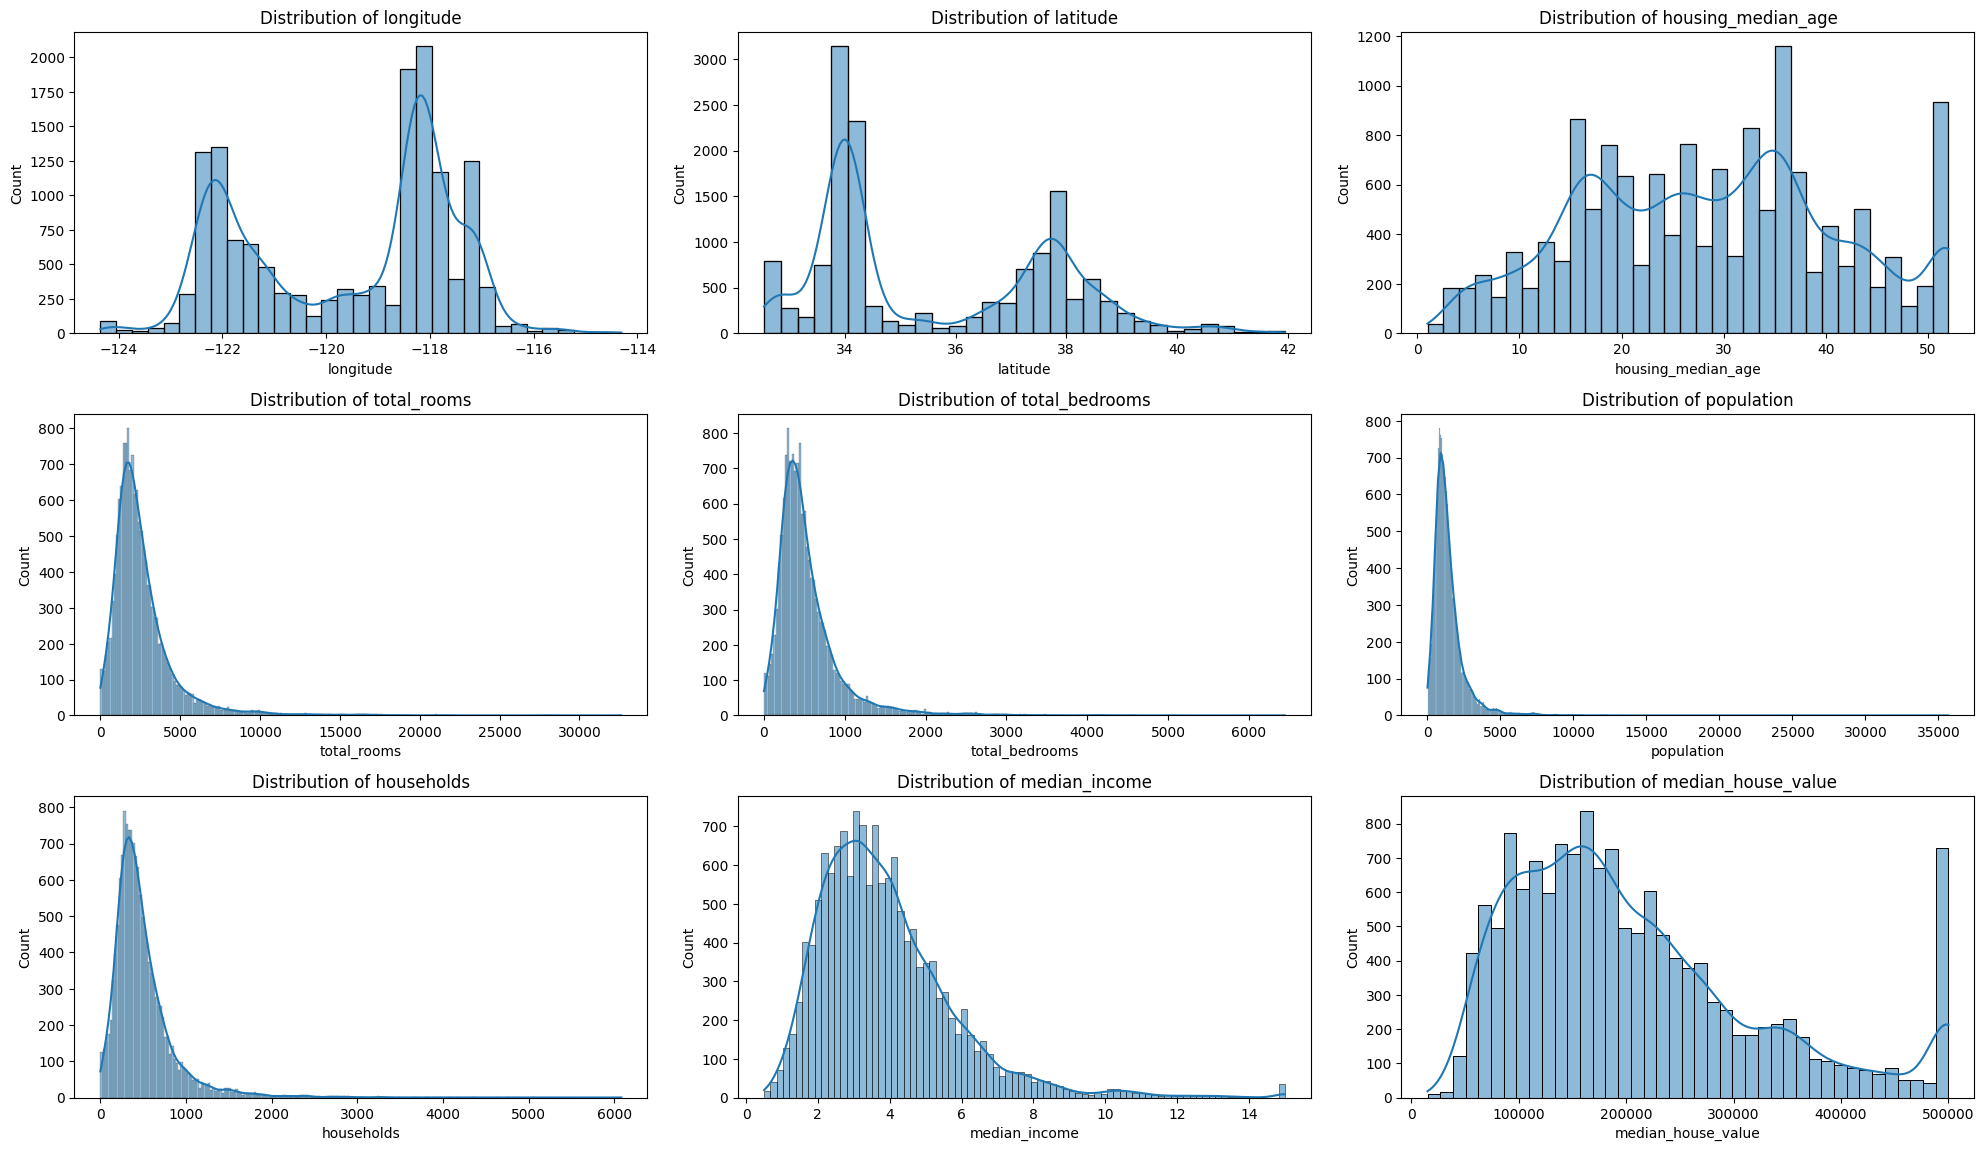

In [18]:
# Data distribution
def plot_data_distribution(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Plotting data distribution
plot_data_distribution(data)

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Skewed Distributions       | Several variables (total_rooms, total_bedrooms, population, households, median_income, and median_house_value) show skewed distributions, indicating that most values are concentrated at the lower end, with some extreme outliers                    |
| Diverse Property Characteristics       | The variation in housing age and the skewed distributions of property features like rooms and bedrooms reflect the diversity of properties in the dataset, from small homes to very large estates                    |
| Income and House Value Relationship       | The distribution of median income and house values suggests that while most properties are within a certain price range, there are some high-value properties, possibly reflecting desirable locations or unique property features                           |

--

### 2.7. Scatter Plot Location

2.7.1. Raw Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

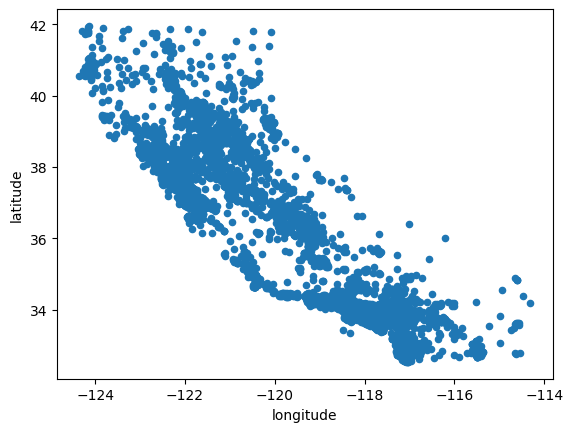

In [19]:
data.plot(kind='scatter', x='longitude', y='latitude')

2.7.2. Better Scatter Plot

<Axes: xlabel='longitude', ylabel='latitude'>

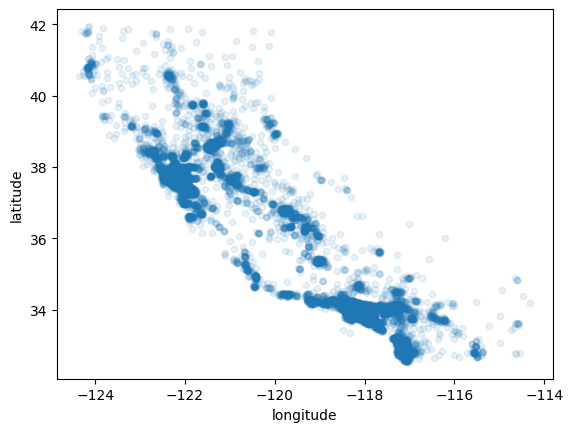

In [20]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

---

# 3. Exploratory Data Analysis

### 3.1. Data Correlation

3.1.1. Heatmap

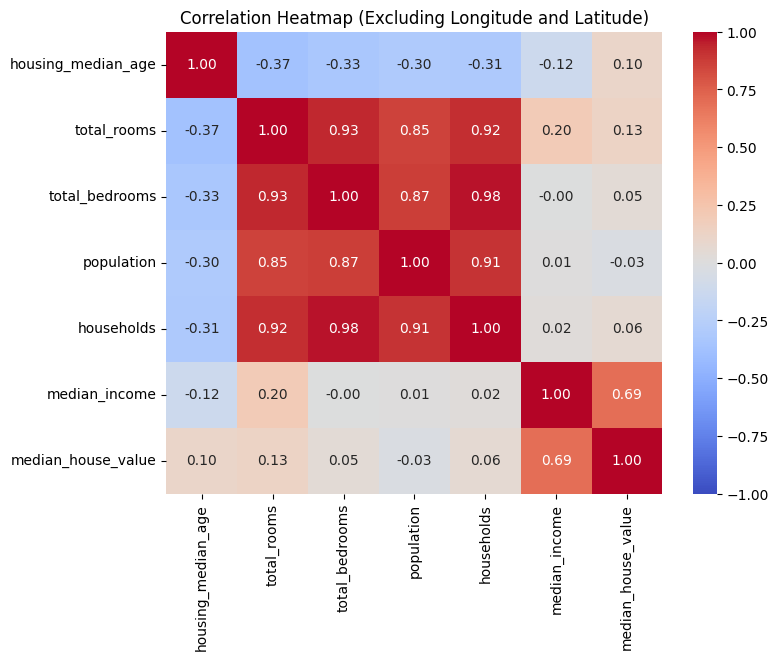

In [21]:
# Exclude 'longitude' and 'latitude' columns
selected_columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Calculate correlation matrix for the selected columns
correlation_matrix = data[selected_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Longitude and Latitude)')
plt.show()

- This heatmap reveals strong positive correlations between total_rooms, total_bedrooms, population, and households, with correlation coefficients ranging from 0.85 to 0.98.
- These variables are closely related, likely because they all measure aspects of property size and community density.
- Additionally, median_income shows a moderate positive correlation with median_house_value (0.69), indicating that higher income areas tend to have higher property values. These relationships are significant and can be important predictors in modeling property prices.

--

3.1.2. Statistical Tests Correlation For Low Correlation Columns

In [22]:
import pandas as pd
from scipy.stats import spearmanr, kendalltau

# List of pairs with low correlations to test
low_corr_pairs = [
    ('housing_median_age', 'median_house_value'),
    ('total_rooms', 'median_income'),
    ('total_bedrooms', 'median_house_value'),
    ('population', 'median_house_value'),
    ('households', 'median_house_value'),
]

# Dictionary to store results for Spearman and Kendall
spearman_results = {}
kendall_results = {}

# Perform Spearman and Kendall correlation tests
for pair in low_corr_pairs:
    spearman_corr, spearman_p_value = spearmanr(data[pair[0]], data[pair[1]])
    kendall_corr, kendall_p_value = kendalltau(data[pair[0]], data[pair[1]])
    
    spearman_results[pair] = {'spearman_corr': spearman_corr, 'spearman_p_value': spearman_p_value}
    kendall_results[pair] = {'kendall_corr': kendall_corr, 'kendall_p_value': kendall_p_value}

# Convert the results into DataFrames
spearman_df = pd.DataFrame(spearman_results).T
kendall_df = pd.DataFrame(kendall_results).T

In [23]:
spearman_df

,,spearman_corr,spearman_p_value
housing_median_age,median_house_value,0.072069,4.199504e-18
total_rooms,median_income,0.271127,7.587860e-242
total_bedrooms,median_house_value,0.081159,1.505396e-22
population,median_house_value,-0.001653,8.425552e-01
households,median_house_value,0.108217,6.793717e-39


In [24]:
kendall_df

,,kendall_corr,kendall_p_value
housing_median_age,median_house_value,0.047976,1.479043e-17
total_rooms,median_income,0.183378,1.435329e-239
total_bedrooms,median_house_value,0.054273,1.585440e-22
population,median_house_value,-0.001400,8.010521e-01
households,median_house_value,0.072318,1.042206e-38


- Summary:
    - This analysis highlights that while there may be some significant correlations, their practical impact is limited.
    - It is quite similar to what have the heatmap shown.

--

### 3.2. Explore Feature and Target Relationships
- Objective: Understand how individual features impact the target variable (median_house_value).
- Approach:
    - Generate scatter plots, box plots, or other visualizations to explore relationships between features and the target variable
    - Consider the potential use of advanced techniques like clustering to identify groups within the data that share similar characteristics and analyze their impact on house values

3.2.1. Scatter Plot for median_income vs. median_house_value
- Purpose: 
    - To observe the trend between income and house values. Typically, higher income is associated with higher house values.

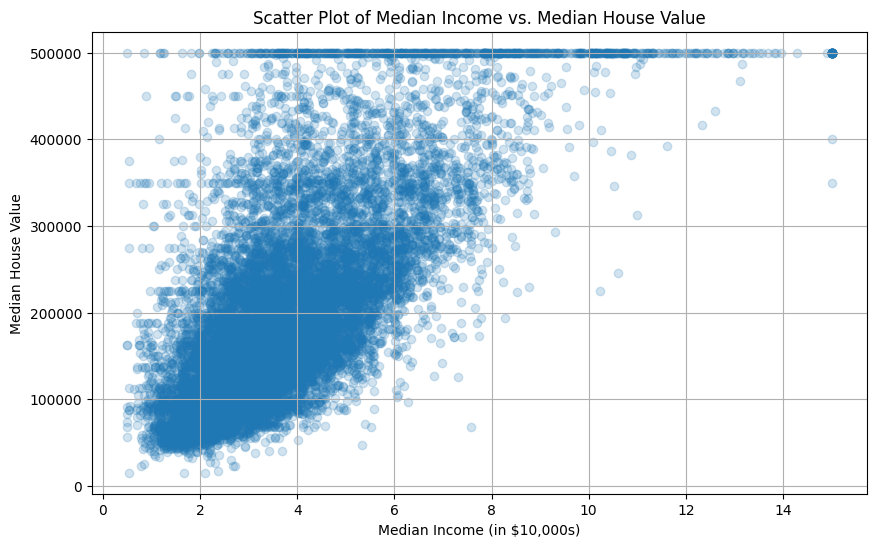

In [25]:
# Scatter plot of median_income vs. median_house_value
plt.figure(figsize=(10, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.2)
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value')
plt.grid(True)
plt.show()

- Analysis:

| **Analysis** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Positive Correlation       | There is a clear positive correlation between median_income and median_house_value. As median income increases, the median house value also tends to increase. This relationship is intuitive, as higher income levels generally lead to higher purchasing power, enabling people to afford more expensive homes                    |
| Ceiling Effect at $500,000       | There is a noticeable horizontal line at the $500,000 mark, indicating a cap on median_house_value. This suggests that the dataset may have a maximum recorded value for house prices, possibly due to a data collection or reporting limit. Many homes have values clustered at this upper limit, which could distort some analyses if not accounted for                    |
| Distribution of Data Points       | The majority of data points are concentrated in the lower left section of the plot, where both income and house values are relatively low. This suggests that a significant portion of the population falls within lower income brackets, correlating with more affordable housing                           |
|      | There are fewer data points as income increases, with a wider spread of house values. This indicates more variability in house prices as income levels rise                           |

--

3.2.2. Distribution of Median House Values

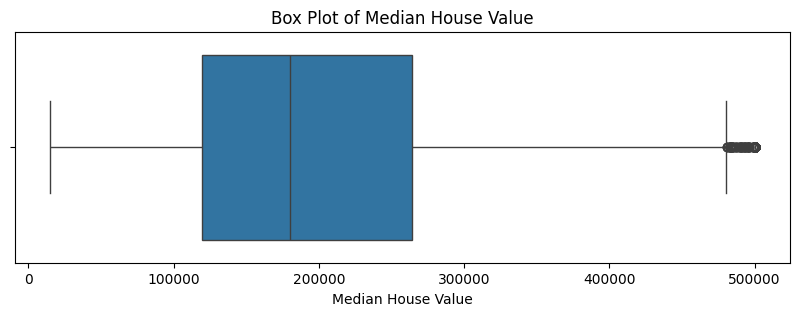

In [26]:
# Box plot for 'median_house_value'
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['median_house_value'])
plt.title('Box Plot of Median House Value')
plt.xlabel('Median House Value')
plt.show()

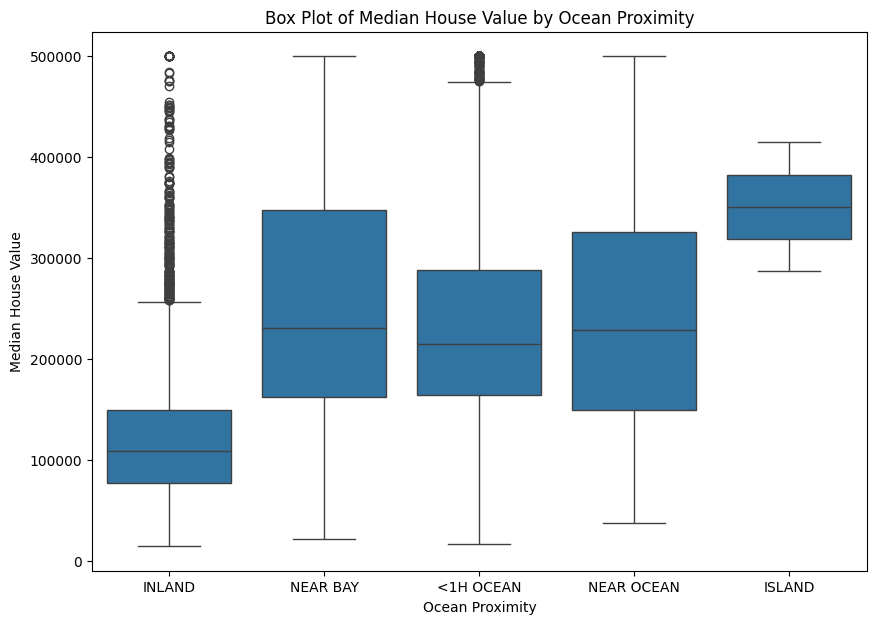

In [27]:
# Box plot for 'median_house_value' by 'ocean_proximity'
plt.figure(figsize=(10, 7))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Box Plot of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

- Key Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
|Impact of Proximity to Water       | Proximity to water (ocean, bay, or being on an island) significantly increases property values. Inland properties are generally less valuable, while those near water or on islands command higher prices                    |
| Variation in Property Values       | There is considerable variation in property values within each category, especially for inland and near-ocean properties. This could be due to differences in property size, amenities, or specific location factors                    |
| Outliers       | Inland properties have the most significant number of outliers, indicating that while most properties are less expensive, there are some high-value exceptions, likely due to specific desirable characteristics                           |

    - These insights highlight the importance of location, especially proximity to water, in determining property values. The outliers in the inland category suggest that even in generally less expensive areas, certain properties can achieve much higher prices, possibly due to unique features.

--

3.2.3. Population and Median House Value Scatter Plot

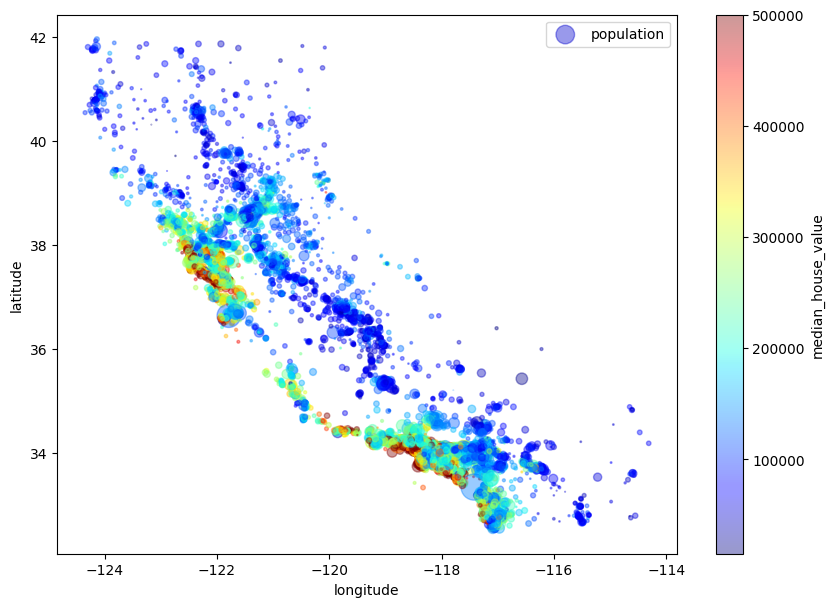

In [28]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
        s= data["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
sharex=False)
plt.legend()

- The scatter plot reveals distinct patterns and areas with varying house prices. 
- Generally, house prices increase as properties are located closer to the ocean and in densely populated regions. Applying a clustering algorithm could help identify the main clusters, which could lead to creating new features that measure proximity to these cluster centers. 
- The ocean_proximity attribute might also be beneficial, although in Northern California, coastal districts don’t always have the highest prices, indicating that location alone doesn’t fully determine property value.

--

3.2.4. Ceiling Effects Analysis

In [29]:
# Count the number of rows where median_house_value is capped at $500,000
capped_values_count = data[data['median_house_value'] == 500000].shape[0]

# Display the result
print(f"Number of rows with capped values at $500,000: {capped_values_count}")

Number of rows with capped values at $500,000: 18


In [30]:
# Filter rows with capped median_house_value
capped_rows = data[data['median_house_value'] == 500000]

# Summary statistics for capped rows
capped_rows_summary = capped_rows.describe()

# Display the summary
capped_rows_summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,-120.461111,35.908889,37.944444,2195.611111,545.833333,1014.166667,500.555556,3.875456,500000.0
std,2.223600,1.968669,13.527628,1194.100210,358.113234,696.184750,317.814823,1.239169,0.0
min,-122.490000,33.190000,19.000000,352.000000,41.000000,99.000000,34.000000,1.265600,500000.0
25%,-122.437500,34.002500,26.750000,1630.000000,366.750000,751.250000,356.250000,3.311225,500000.0
50%,-122.130000,37.050000,33.500000,2189.500000,422.000000,859.000000,414.000000,3.825400,500000.0
75%,-118.230000,37.767500,52.000000,2596.000000,613.250000,1054.000000,576.750000,4.673800,500000.0
max,-117.380000,37.800000,52.000000,5283.000000,1330.000000,2667.000000,1269.000000,5.840800,500000.0


In [31]:
# Summary statistics for the full dataset
full_dataset_summary = data.describe()

# Display the summary for comparison
full_dataset_summary

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,537.281561,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,421.683154,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,645.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- Conclusion:

    - The analysis shows that capped values, though few, represent properties in potentially older and more established neighborhoods. These properties are not necessarily in areas with the highest incomes, indicating that other factors (e.g., location, demand, and scarcity) might be driving the high prices.

--

3.2.5. Explanation for Not Mitigating the Ceiling Effect

- In this analysis, the decision was made not to mitigate the ceiling effect present in the median_house_value at $500,000. Instead, the focus is on using the median for feature engineering and other modeling steps. This approach was chosen for the following reasons:

    1.	Robustness Against Outliers:
        - The median is less sensitive to outliers and extreme values, such as the capped house values at $500,000. By relying on the median, the model remains robust and reduces the influence of these extreme values, ensuring more reliable insights from the data.
    2.	Simplicity and Consistency:
        - Avoiding additional steps to mitigate the ceiling effect allows the analysis to proceed in a straightforward manner. This approach ensures consistency across the dataset and avoids introducing complexity that might complicate the interpretation of results.
    3.	Representation of Real-World Conditions:
        - The ceiling effect at $500,000 likely reflects real-world market conditions, such as reporting limits or demand saturation in certain areas. By retaining the original data distribution, the analysis maintains its alignment with these real-world phenomena.
    4.	Focus on Median-Based Insights:
        - Given the skewed nature of the data, using the median as the central tendency measure throughout the analysis helps provide a more accurate representation of typical values, minimizing the impact of extreme data points on the overall model.
    
- Future Consideration:
    - As the analysis progresses, especially during model evaluation, the decision to not mitigate the ceiling effect will be revisited if significant issues arise in predicting high-value properties. Adjustments may be made post-modeling if necessary to ensure accurate predictions across all property values.

---

# 4. Data Preparation

### 4.1. Create Hyper-focus Data With Relevant Columns

4.1.1. Correlation Matrix And Heatmap

In [32]:
correlation_matrix = data.corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045633
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64


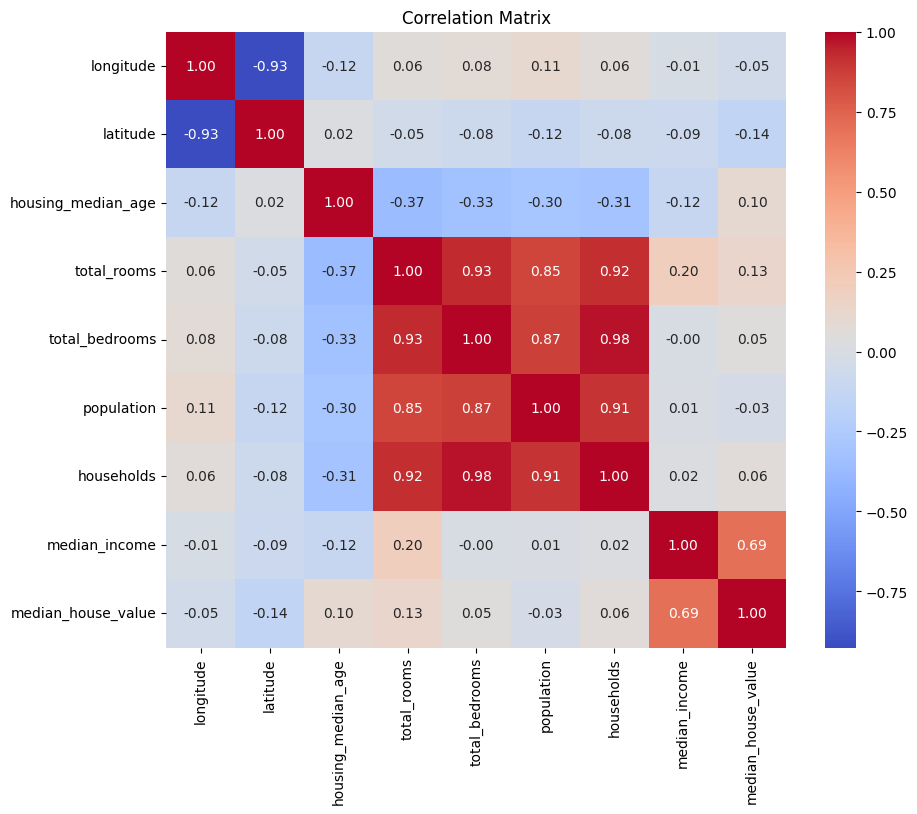

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Summary: 
    - In the initial correlation matrix, total_bedrooms, population, and households were observed to have very weak correlations with median_house_value, indicating that they may not significantly contribute to predicting house values.”

--

4.1.2. Perform and Explain the Statistical Tests
- Explain that to further validate the weak correlations, non-parametric tests (Spearman and Kendall) were conducted, which are more robust for non-normally distributed data.

In [34]:
# List of additional features to test
additional_features = ['total_bedrooms', 'population', 'households']

# Dictionary to store results
spearman_results = {}
kendall_results = {}

# Perform Spearman and Kendall correlation tests
for feature in additional_features:
    spearman_corr, spearman_p_value = spearmanr(data[feature], data['median_house_value'])
    kendall_corr, kendall_p_value = kendalltau(data[feature], data['median_house_value'])
    
    spearman_results[feature] = {'spearman_corr': spearman_corr, 'spearman_p_value': spearman_p_value}
    kendall_results[feature] = {'kendall_corr': kendall_corr, 'kendall_p_value': kendall_p_value}

# Convert to DataFrame for display
import pandas as pd
spearman_df = pd.DataFrame(spearman_results).T
kendall_df = pd.DataFrame(kendall_results).T

# Display the results
print("Spearman Correlation Results:")
print(spearman_df)
print("\nKendall Correlation Results:")
print(kendall_df)

Spearman Correlation Results:
                spearman_corr  spearman_p_value
total_bedrooms       0.081159      1.505396e-22
population          -0.001653      8.425552e-01
households           0.108217      6.793717e-39

Kendall Correlation Results:
                kendall_corr  kendall_p_value
total_bedrooms      0.054273     1.585440e-22
population         -0.001400     8.010521e-01
households          0.072318     1.042206e-38


In [35]:
# Perform Spearman and Kendall correlation tests
spearman_corr_bedrooms, spearman_p_value_bedrooms = spearmanr(data['total_bedrooms'], data['median_house_value'])
spearman_corr_population, spearman_p_value_population = spearmanr(data['population'], data['median_house_value'])
spearman_corr_households, spearman_p_value_households = spearmanr(data['households'], data['median_house_value'])

kendall_corr_bedrooms, kendall_p_value_bedrooms = kendalltau(data['total_bedrooms'], data['median_house_value'])
kendall_corr_population, kendall_p_value_population = kendalltau(data['population'], data['median_house_value'])
kendall_corr_households, kendall_p_value_households = kendalltau(data['households'], data['median_house_value'])

# Print the results
print("Spearman Correlation Results:")
print(f"total_bedrooms: correlation = {spearman_corr_bedrooms}, p-value = {spearman_p_value_bedrooms}")
print(f"population: correlation = {spearman_corr_population}, p-value = {spearman_p_value_population}")
print(f"households: correlation = {spearman_corr_households}, p-value = {spearman_p_value_households}\n")

print("Kendall Correlation Results:")
print(f"total_bedrooms: correlation = {kendall_corr_bedrooms}, p-value = {kendall_p_value_bedrooms}")
print(f"population: correlation = {kendall_corr_population}, p-value = {kendall_p_value_population}")
print(f"households: correlation = {kendall_corr_households}, p-value = {kendall_p_value_households}")

Spearman Correlation Results:
total_bedrooms: correlation = 0.08115931222057685, p-value = 1.5053956361901292e-22
population: correlation = -0.001652608094491021, p-value = 0.8425551832276719
households: correlation = 0.10821738516849333, p-value = 6.793717329046734e-39

Kendall Correlation Results:
total_bedrooms: correlation = 0.054273204001552555, p-value = 1.5854399734654145e-22
population: correlation = -0.0013998921014307267, p-value = 0.8010521002250789
households: correlation = 0.0723178605698386, p-value = 1.042206476760171e-38


- Insights:
    - Spearman and Kendall correlation tests to assess the relationship between these features and median_house_value. The results confirmed that the correlations are very weak, reinforcing the decision to consider dropping these features
    - The Spearman and Kendall correlation results both indicate weak correlations between (longitude, latitude, total_bedrooms, population, and households) with median_house_value. Despite statistical significance, the strength of these correlations is minimal, making these features less relevant for the model

--

4.1.3. Decision to Keep the Features
- Based on the model evaluation results, it was observed that removing features such as total_bedrooms, population, households, longitude, and latitude resulted in lower performance metrics compared to the model trained on the original dataset with all features included. 
    - Therefore, it is decided to keep these features in the dataset. 
    - Retaining these columns will allow the model to capture additional relationships that might have been overlooked when they were excluded.
    - This decision is justified by the higher predictive accuracy demonstrated in the comparison between the cleaned and original datasets.

--

### 4.2. Feature Transformation

4.2.1. Applying Log Transformation To Handle Outliers

In [36]:
# Apply logarithmic transformation to the median_house_value feature
data['log_median_house_value'] = np.log1p(data['median_house_value'])

# Drop the original median_house_value column if you only want to keep the transformed version
data = data.drop('median_house_value', axis=1)

# Display the first few rows to see the transformation
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,log_median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,10.768506
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,11.512935
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,12.563051
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,12.072547
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,10.988694


--

4.2.2. Split The Data

In [37]:
# Define features and target
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

# Exclude the categorical column
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X[numerical_cols], y, test_size=0.2, random_state=42)

--

4.2.3. Data Scaling

In [38]:
# Min-Max Scaler
scaler = MinMaxScaler()
X_minmax = pd.DataFrame(
    data=scaler.fit_transform(X_train), 
    columns=X_train.columns
)

# Standard Scaler
scaler = StandardScaler()
X_standard = pd.DataFrame(
    data=scaler.fit_transform(X_train), 
    columns=X_train.columns
)

# Robust Scaler
scaler = RobustScaler()
X_robust = pd.DataFrame(
    data=scaler.fit_transform(X_train), 
    columns=X_train.columns
)

--

4.2.4. Visualization Before & After Scaling

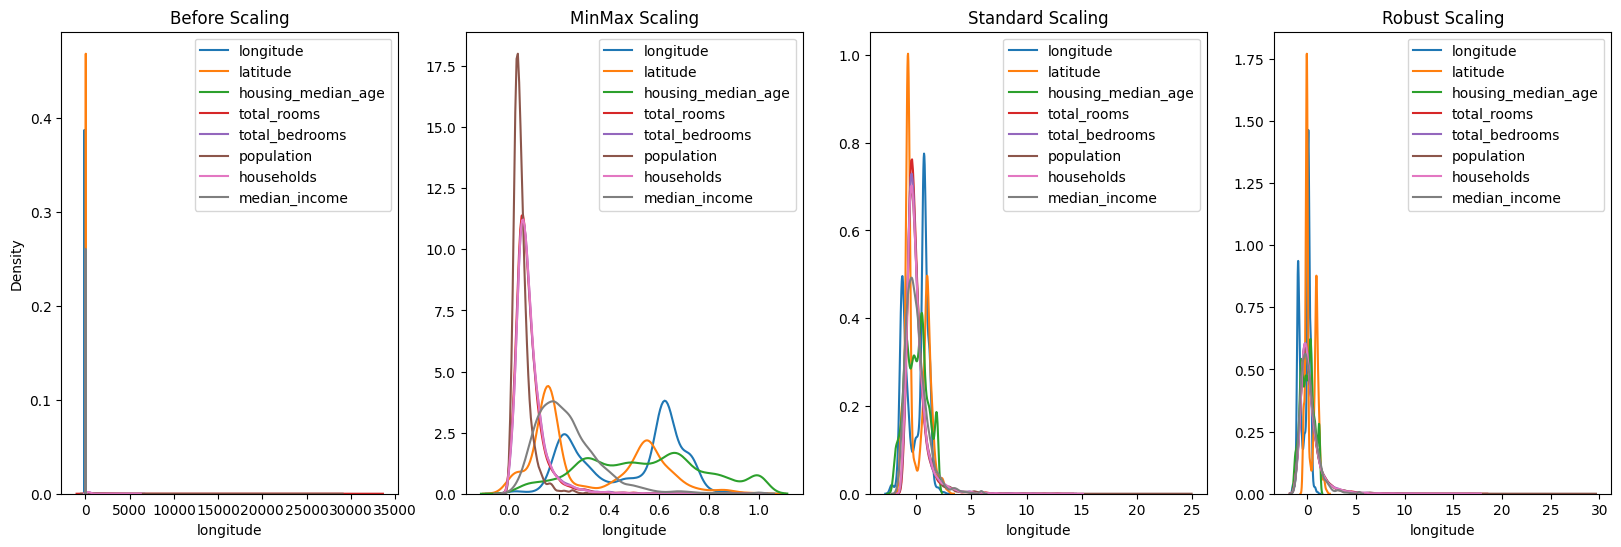

In [39]:
# Plot the KDEs
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 6))

# before scaling
ax1.set_title('Before Scaling')
for column in X_train.columns:
    sns.kdeplot(X_train[column], ax=ax1, label=column)
ax1.legend()

# minmax scaler
ax2.set_title('MinMax Scaling')
for column in X_minmax.columns:
    sns.kdeplot(X_minmax[column], ax=ax2, label=column).set(ylabel=None)
ax2.legend()

# standard scaler
ax3.set_title('Standard Scaling')
for column in X_standard.columns:
    sns.kdeplot(X_standard[column], ax=ax3, label=column).set(ylabel=None)
ax3.legend()

# robust scaler
ax4.set_title('Robust Scaling')
for column in X_robust.columns:
    sns.kdeplot(X_robust[column], ax=ax4, label=column).set(ylabel=None)
ax4.legend()

plt.show()

--

In [40]:
import sklearn 



In [41]:
from pycaret.regression import *

# Ensure data is a copy to avoid modifying the original
data_encoded = data.copy()

# Set up the PyCaret environment
regression_setup = setup(data=data_encoded, target='log_median_house_value', session_id=42, 
                         normalize=True, normalize_method='robust', 
                         categorical_features=['ocean_proximity'], 
                         silent=True)

# Get a list of all available models in PyCaret
all_models = models()

# Tune each model's hyperparameters
tuned_models = []
for model_name in all_models.index:
    print(f"Tuning model: {model_name}")
    tuned_model = tune_model(model_name, n_iter=50, optimize='MAE')  # Adjust n_iter for more/less tuning
    tuned_models.append(tuned_model)

# Compare all tuned models
compare_models(tuned_models, sort='MAE')

# Evaluate the best model
best_model = tuned_models[0]  # Assuming the first tuned model is the best based on your sorting
evaluate_model(best_model)

ImportError: cannot import name '_Scorer' from 'sklearn.metrics._scorer' (/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py)

In [ ]:
!pip install pycaret==3.0.4

  Using cached pycaret-3.0.4-py3-none-any.whl.metadata (17 kB)
INFO: pip is looking at multiple versions of plotly-resampler to determine which version is compatible with other requirements. This could take a while.
  Using cached plotly_resampler-0.9.2-py3-none-any.whl.metadata (13 kB)
  Using cached plotly_resampler-0.9.1-py3-none-any.whl.metadata (12 kB)
  Using cached plotly_resampler-0.9.0-py3-none-any.whl.metadata (12 kB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_dash-0.4.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached plotly-resampler-0.8.3.1.tar.gz (68 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached Werkzeug-2.1.2-py3-none-any.whl.

### 4.3. Building Pipeline

4.3.1. Pipeline 2 (Finding The Best Models)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

# List of models to evaluate
models = [
    ('XGBoost', XGBRegressor()),
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor()),
    ('LinearRegression', LinearRegression()),
    ('SVR', SVR()),
    ('DecisionTree', DecisionTreeRegressor()),
    ('AdaBoost', AdaBoostRegressor()),
    ('KNeighbors', KNeighborsRegressor()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('ElasticNet', ElasticNet()),
    ('LightGBM', LGBMRegressor()),
    ('ExtraTrees', ExtraTreesRegressor())
]

# Placeholder to store results
results = []

for name, model in models:
    # Create the pipeline for the current model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # Use GridSearchCV without hyperparameter grid (only default parameters)
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid={},  # No hyperparameter tuning
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_absolute_error',  # You can change this based on what metric you prefer
        n_jobs=-1,  # Use all available CPUs
        verbose=1
    )
    
    # Fit the GridSearchCV
    grid_search.fit(X_train, y_train)
    
    # Evaluate the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    results_model = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Store the results
    results.append((name, results_model))

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame([result[1] for result in results], index=[result[0] for result in results])

# Display the results
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bin

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
XGBoost,9.348146e-02,1.587855e-01,1.258718e-01,2.289863e-01,0.950910,8.392685e-01
RandomForest,6.144375e-02,1.614151e-01,8.933992e-02,2.337722e-01,0.975270,8.324796e-01
GradientBoosting,1.859911e-01,1.911557e-01,2.511456e-01,2.583807e-01,0.804573,7.953545e-01
LinearRegression,2.502254e-01,5.990931e+07,3.292677e-01,2.277342e+09,0.664084,-1.589785e+19
SVR,1.889371e-01,1.942883e-01,2.635875e-01,2.708334e-01,0.784731,7.751535e-01
DecisionTree,1.483115e-16,2.272673e-01,1.421842e-15,3.316553e-01,1.000000,6.628247e-01
AdaBoost,2.892672e-01,2.848666e-01,3.597189e-01,3.573764e-01,0.599079,6.084984e-01
KNeighbors,1.721350e-01,2.101404e-01,2.387253e-01,2.904581e-01,0.823425,7.413879e-01
Ridge,2.502189e-01,2.480578e-01,3.292649e-01,3.313482e-01,0.664090,6.634489e-01
Lasso,4.588982e-01,4.626344e-01,5.681117e-01,5.712221e-01,0.000000,-2.117037e-04


4.3.2. Summary

1.	XGBoost and LightGBM have performed well, showing low MAE and RMSE values with high  R^2  scores on the test set.
2.	RandomForest also shows strong performance, with slightly higher errors than XGBoost and LightGBM but still within a good range.

Conclusion:
- Focus on XGBoost, LightGBM, and RandomForest for further tuning, as they have shown the best balance of performance on the test set.

---

# 5. Modeling Experiment

### 5.1. Hyperparameter Tuning
- Objective:
    - Optimize the models by finding the best combination of hyperparameters.

5.1.1. Hyperparameter 1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grids with a single value for each parameter

# RandomForest hyperparameter grid
rf_param_grid = {
    'regressor__n_estimators': [200],
    'regressor__max_depth': [20],
    'regressor__min_samples_split': [5],
    'regressor__min_samples_leaf': [2]
}

# LightGBM hyperparameter grid
lgbm_param_grid = {
    'regressor__n_estimators': [200],
    'regressor__max_depth': [5],
    'regressor__learning_rate': [0.05],
    'regressor__subsample': [0.8],
    'regressor__colsample_bytree': [0.8],
    'regressor__lambda_l2': [1.5],
    'regressor__lambda_l1': [0.5]
}

# XGBoost hyperparameter grid
xgb_param_grid = {
    'regressor__n_estimators': [200],
    'regressor__learning_rate': [0.05],
    'regressor__max_depth': [5],
    'regressor__subsample': [0.8],
    'regressor__colsample_bytree': [0.8],
    'regressor__lambda': [1.5],
    'regressor__alpha': [0.5]
}

# Define a function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
    ]
)

# Define models to be tuned with their corresponding parameter grids
models = {
    'RandomForest': (RandomForestRegressor(), rf_param_grid),
    'LightGBM': (LGBMRegressor(), lgbm_param_grid),
    'XGBoost': (XGBRegressor(), xgb_param_grid)
}

# Split the original data
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each model, set up GridSearchCV, fit the pipeline, and evaluate
for model_name, (model, param_grid) in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best model and evaluate
    best_model = grid_search.best_estimator_
    results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Add the results to the DataFrame
    results_df[model_name] = pd.Series(results)

# Transpose the DataFrame for better readability
results_df = results_df.T
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] lambda_l1 is set=0.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5
[LightGBM] [Warning] lambda_l2 is set=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
RandomForest,0.078319,0.160524,0.119531,0.231712,0.955732,0.835419
LightGBM,0.154598,0.169443,0.214969,0.235821,0.856820,0.829530
XGBoost,0.152979,0.169664,0.210916,0.237744,0.862168,0.826739


5.1.2. Hyperparameter 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grids with a single value for each parameter

# RandomForest hyperparameter grid2
rf_param_grid2 = {
    'regressor__n_estimators': [500],
    'regressor__max_depth': [30],
    'regressor__min_samples_split': [10],
    'regressor__min_samples_leaf': [4],
    'regressor__max_features': ['auto']
}

# LightGBM hyperparameter grid2
lgbm_param_grid2 = {
    'regressor__n_estimators': [500],
    'regressor__max_depth': [15],
    'regressor__learning_rate': [0.15],
    'regressor__subsample': [1.0],
    'regressor__colsample_bytree': [1.0],
    'regressor__lambda_l2': [2.0],
    'regressor__lambda_l1': [1.5]
}

# XGBoost hyperparameter grid2
xgb_param_grid2 = {
    'regressor__alpha': [0],
    'regressor__colsample_bytree': [0.8],
    'regressor__gamma': [0],
    'regressor__lambda': [1.5],
    'regressor__learning_rate': [0.05],
    'regressor__max_depth': [9],
    'regressor__n_estimators': [600],
    'regressor__subsample': [1.0],
    'regressor__tree_method': ['auto']
}

# Define a function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
    ]
)

# Define models to be tuned with their corresponding parameter grid2s
models = {
    'RandomForest': (RandomForestRegressor(), rf_param_grid2),
    'LightGBM': (LGBMRegressor(), lgbm_param_grid2),
    'XGBoost': (XGBRegressor(), xgb_param_grid2)
}

# Split the original data
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each model, set up grid2SearchCV, fit the pipeline, and evaluate
for model_name, (model, param_grid2) in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # grid2SearchCV
    grid2_search = GridSearchCV(pipeline, param_grid2, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid2_search.fit(X_train, y_train)
    
    # Get the best model and evaluate
    best_model = grid2_search.best_estimator_
    results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Add the results to the DataFrame
    results_df[model_name] = pd.Series(results)

# Transpose the DataFrame for better readability
results_df = results_df.T
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFore

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=2.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=2.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points in the train set: 9246, number of used features: 12
[LightGBM] [Info] Start training from score 12.085841
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=2.0, reg_lambda=0.0 will be ignored. Current

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
RandomForest,0.105759,0.163539,0.157632,0.234646,0.923012,0.831225
LightGBM,0.091798,0.150830,0.125224,0.220740,0.951414,0.850637
XGBoost,0.030705,0.149049,0.043734,0.220639,0.994074,0.850773


5.1.3. Hyperparameter 3

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grids with a single value for each parameter

# LightGBM hyperparameter grid3
lgbm_param_grid3 = {
    'regressor__n_estimators': [300],                # Reduce the number of boosting iterations to prevent overfitting
    'regressor__max_depth': [10],                    # Reduce the maximum depth of trees
    'regressor__learning_rate': [0.05],              # Keep the learning rate low for more gradual learning
    'regressor__subsample': [0.8],                   # Use a lower subsample to introduce more randomness
    'regressor__colsample_bytree': [0.8],            # Use fewer features to make the model less likely to overfit
    'regressor__lambda_l2': [3.0],                   # Increase L2 regularization to penalize large weights
    'regressor__lambda_l1': [2.0],                   # Increase L1 regularization to promote sparsity in the model
    'regressor__min_child_weight': [5]  
}

# XGBoost hyperparameter grid3
xgb_param_grid3 = {
    'regressor__n_estimators': [300],                # Reduce the number of trees
    'regressor__max_depth': [7],                     # Reduce the tree depth
    'regressor__learning_rate': [0.05],              # Keep the learning rate low for gradual learning
    'regressor__subsample': [0.8],                   # Use a lower subsample ratio to introduce more randomness
    'regressor__colsample_bytree': [0.8],            # Use fewer features per tree
    'regressor__lambda': [3.0],                      # Increase L2 regularization
    'regressor__alpha': [2.0],                       # Increase L1 regularization
    'regressor__min_child_weight': [5]               # Increase to control the minimum sum of instance wei
}

# Define a function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
    ]
)

# Define models to be tuned with their corresponding parameter grid3s
models = {
    'LightGBM': (LGBMRegressor(), lgbm_param_grid3),
    'XGBoost': (XGBRegressor(), xgb_param_grid3)
}

# Split the original data
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each model, set up grid3SearchCV, fit the pipeline, and evaluate
for model_name, (model, param_grid3) in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # grid3SearchCV
    grid3_search = GridSearchCV(pipeline, param_grid3, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid3_search.fit(X_train, y_train)
    
    # Get the best model and evaluate
    best_model = grid3_search.best_estimator_
    results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Add the results to the DataFrame
    results_df[model_name] = pd.Series(results)

# Transpose the DataFrame for better readability
results_df = results_df.T
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l1 is set=2.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0[LightGBM] [Warning] lambda_l1 is set=2.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0

[LightGBM] [Warning] lambda_l2 is set=3.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0
[LightGBM] [Warning] lambda_l1 is set=2.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0[LightGBM] [Warning] lambda_l1 is set=2.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0[LightGBM] [Warning] lambda_l1 is set=2.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0
[LightGBM] [Warning] lambda_l2 is set=3.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0

[LightGBM] [Warning] lambda_l2 is set=3.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0

[LightGBM] [Warning] lambda_l2 is set=3.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0
[LightGBM]

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
LightGBM,0.13494,0.155466,0.189576,0.221972,0.888647,0.848965
XGBoost,0.12380,0.154627,0.173789,0.223019,0.906421,0.847536


5.1.4. Hyperparameter 4

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grids with a single value for each parameter

# LightGBM hyperparameter grid4
lgbm_param_grid4 = {
    'regressor__n_estimators': [300],                # Reduce the number of boosting rounds slightly
    'regressor__max_depth': [8],                     # Further reduce the tree depth to prevent overfitting
    'regressor__learning_rate': [0.05],              # Keep the learning rate low for steady learning
    'regressor__subsample': [0.7],                   # Lower subsample to introduce more randomness
    'regressor__colsample_bytree': [0.7],            # Use fewer features per tree
    'regressor__lambda_l2': [3.5],                   # Increase L2 regularization further
    'regressor__lambda_l1': [2.5],                   # Increase L1 regularization to enforce sparsity
    'regressor__min_child_weight': [6]               # Increase further to make the model more conservative
}

# XGBoost hyperparameter grid4
xgb_param_grid4 = {
    'regressor__n_estimators': [300],                # Reduce the number of trees
    'regressor__max_depth': [6],                     # Further reduce the depth of trees
    'regressor__learning_rate': [0.05],              # Keep the learning rate low
    'regressor__subsample': [0.7],                   # Lower subsample to introduce more randomness
    'regressor__colsample_bytree': [0.7],            # Use fewer features per tree
    'regressor__lambda': [3.5],                      # Increase L2 regularization further
    'regressor__alpha': [2.5],                       # Increase L1 regularization
    'regressor__min_child_weight': [6]               # Increase to control the minimum sum of instance weight needed in a child
}

# Define a function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
    ]
)

# Define models to be tuned with their corresponding parameter grid4s
models = {
    'LightGBM': (LGBMRegressor(), lgbm_param_grid4),
    'XGBoost': (XGBRegressor(), xgb_param_grid4)
}

# Split the original data
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each model, set up grid4SearchCV, fit the pipeline, and evaluate
for model_name, (model, param_grid4) in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # grid4SearchCV
    grid4_search = GridSearchCV(pipeline, param_grid4, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid4_search.fit(X_train, y_train)
    
    # Get the best model and evaluate
    best_model = grid4_search.best_estimator_
    results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Add the results to the DataFrame
    results_df[model_name] = pd.Series(results)

# Transpose the DataFrame for better readability
results_df = results_df.T
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=3.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=3.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5
[LightGBM] [Warning] lambda_l2 is set=3.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Warning] lambda_l1 is set=2.5, reg_alpha=0.0 wil

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
LightGBM,0.138968,0.157716,0.195655,0.224595,0.881392,0.845375
XGBoost,0.141088,0.160583,0.197735,0.228711,0.878857,0.839655


5.1.5. Hyperparameter 5

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grids with a single value for each parameter

# LightGBM hyperparameter grid5
lgbm_param_grid5 = {
 'regressor__colsample_bytree': [0.8],
 'regressor__gamma': [0],
 'regressor__lambda': [1.5],
 'regressor__learning_rate': [0.05],
 'regressor__max_depth': [9],
 'regressor__n_estimators': [600],
 'regressor__subsample': [1.0],
 'regressor__tree_method': ['auto']  
}

# XGBoost hyperparameter grid5
xgb_param_grid5 = {
'regressor__alpha': [0],
 'regressor__colsample_bytree': [0.8],
 'regressor__gamma': [0],
 'regressor__lambda': [1.5],
 'regressor__learning_rate': [0.05],
 'regressor__max_depth': [9],
 'regressor__n_estimators': [600],
 'regressor__subsample': [1.0],
 'regressor__tree_method': ['auto']              
}

# Define a function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
    ]
)

# Define models to be tuned with their corresponding parameter grid5s
models = {
    'LightGBM': (LGBMRegressor(), lgbm_param_grid5),
    'XGBoost': (XGBRegressor(), xgb_param_grid5)
}

# Split the original data
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each model, set up grid5SearchCV, fit the pipeline, and evaluate
for model_name, (model, param_grid5) in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # grid5SearchCV
    grid5_search = GridSearchCV(pipeline, param_grid5, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid5_search.fit(X_train, y_train)
    
    # Get the best model and evaluate
    best_model = grid5_search.best_estimator_
    results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Add the results to the DataFrame
    results_df[model_name] = pd.Series(results)

# Transpose the DataFrame for better readability
results_df = results_df.T
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l2 is set with lambda=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] lambda_l2 is set with lambda=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] lambda_l2 is set with lambda=1.5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1844
[LightGBM] [Info] Number of data points

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
LightGBM,0.109083,0.152099,0.151682,0.218870,0.928715,0.853157
XGBoost,0.030705,0.149049,0.043734,0.220639,0.994074,0.850773


5.1.6. Hyperparameter 6

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grids with a single value for each parameter

# LightGBM hyperparameter grid6
lgbm_param_grid6 = {
    'regressor__n_estimators': [300],
    'regressor__max_depth': [7],
    'regressor__learning_rate': [0.05],
    'regressor__subsample': [0.7],
    'regressor__colsample_bytree': [0.7],
    'regressor__lambda_l2': [4.0],  # Increased regularization
    'regressor__lambda_l1': [3.0],  # Increased regularization
    'regressor__min_child_weight': [6]
}

# XGBoost hyperparameter grid6
xgb_param_grid6 = {
    'regressor__n_estimators': [300],
    'regressor__max_depth': [6],
    'regressor__learning_rate': [0.05],
    'regressor__subsample': [0.7],
    'regressor__colsample_bytree': [0.7],
    'regressor__lambda': [4.0],  # Increased regularization
    'regressor__alpha': [3.0],   # Increased regularization
    'regressor__min_child_weight': [6]           
}

# Define a function for evaluating the model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return {
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R² Train': r2_train,
        'R² Test': r2_test
    }

# Set up the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
        ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
    ]
)

# Define models to be tuned with their corresponding parameter grid6s
models = {
    'LightGBM': (LGBMRegressor(), lgbm_param_grid6),
    'XGBoost': (XGBRegressor(), xgb_param_grid6)
}

# Split the original data
X = data.drop('log_median_house_value', axis=1)
y = data['log_median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame()

# Loop over each model, set up grid6SearchCV, fit the pipeline, and evaluate
for model_name, (model, param_grid6) in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    # grid6SearchCV
    grid6_search = GridSearchCV(pipeline, param_grid6, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid6_search.fit(X_train, y_train)
    
    # Get the best model and evaluate
    best_model = grid6_search.best_estimator_
    results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
    # Add the results to the DataFrame
    results_df[model_name] = pd.Series(results)

# Transpose the DataFrame for better readability
results_df = results_df.T
results_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] lambda_l1 is set=3.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0[LightGBM] [Warning] lambda_l1 is set=3.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0

[LightGBM] [Warning] lambda_l1 is set=3.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0[LightGBM] [Warning] lambda_l2 is set=4.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0

[LightGBM] [Warning] lambda_l2 is set=4.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0[LightGBM] [Warning] lambda_l1 is set=3.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0

[LightGBM] [Warning] lambda_l1 is set=3.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.0[LightGBM] [Warning] lambda_l2 is set=4.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0[LightGBM] [Warning] lambda_l2 is set=4.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0


[LightGBM]

,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
LightGBM,0.141316,0.158109,0.199522,0.225407,0.876657,0.844254
XGBoost,0.143039,0.160868,0.201031,0.229658,0.874784,0.838325


In [ ]:
# # Define hyperparameter grids for each model

# # RandomForest hyperparameter grid
# rf_param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__max_depth': [None, 10, 20],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }

# # GradientBoosting hyperparameter grid
# gb_param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__learning_rate': [0.01, 0.1, 0.2],
#     'regressor__max_depth': [3, 5, 10],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }

# # XGBoost hyperparameter grid
# xgb_param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__learning_rate': [0.01, 0.1, 0.2],
#     'regressor__max_depth': [3, 5, 10]
# }

# # Define a function for evaluating the model
# def evaluate_model(model, X_train, y_train, X_test, y_test):
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
    
#     mae_train = mean_absolute_error(y_train, y_train_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)
    
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
#     r2_train = r2_score(y_train, y_train_pred)
#     r2_test = r2_score(y_test, y_test_pred)
    
#     return {
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R² Train': r2_train,
#         'R² Test': r2_test
#     }

# # Set up the preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity']),
#         ('num', RobustScaler(), data.drop(['log_median_house_value', 'ocean_proximity'], axis=1).columns)
#     ]
# )

# # Define models to be tuned with their corresponding parameter grids
# models = {
#     'RandomForest': (RandomForestRegressor(), rf_param_grid),
#     'GradientBoosting': (GradientBoostingRegressor(), gb_param_grid),
#     'XGBoost': (XGBRegressor(), xgb_param_grid)
# }

# # Split the original data
# X = data.drop('log_median_house_value', axis=1)
# y = data['log_median_house_value']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize an empty DataFrame to store the results
# results_df = pd.DataFrame()

# # Loop over each model, set up GridSearchCV, fit the pipeline, and evaluate
# for model_name, (model, param_grid) in models.items():
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', model)
#     ])
    
#     # GridSearchCV
#     grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
    
#     # Fit the model
#     grid_search.fit(X_train, y_train)
    
#     # Get the best model and evaluate
#     best_model = grid_search.best_estimator_
#     results = evaluate_model(best_model, X_train, y_train, X_test, y_test)
    
#     # Add the results to the DataFrame
#     results_df[model_name] = pd.Series(results)

# # Transpose the DataFrame for better readability
# results_df = results_df.T
# results_df

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
RandomForest,0.078264,0.161152,0.119771,0.232831,0.955554,0.833826
GradientBoosting,0.024396,0.154700,0.035362,0.229173,0.996125,0.839006
XGBoost,0.090395,0.155883,0.121630,0.228184,0.954163,0.840393


In [ ]:
# # Adjusted parameter grid for XGBoost
# param_grid_xgboost = {
#     'regressor__n_estimators': [100, 200, 400, 600],
#     'regressor__max_depth': [3, 5, 7, 9],
#     'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'regressor__subsample': [0.6, 0.8, 1.0],
#     'regressor__colsample_bytree': [0.6, 0.8, 1.0],
#     'regressor__lambda': [1, 1.5, 2],
#     'regressor__alpha': [0, 0.5, 1],
#     'regressor__gamma': [0, 0.1, 0.3],
#     'regressor__tree_method': ['auto', 'hist']
# }

# # Create the pipeline for XGBoost
# pipeline_xgboost = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', XGBRegressor())
# ])

# # Perform GridSearchCV with the new parameter grid
# grid_search_xgboost = GridSearchCV(
#     estimator=pipeline_xgboost,
#     param_grid=param_grid_xgboost,
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_absolute_error',  # You can change this based on what metric you prefer
#     n_jobs=-1,  # Use all available CPUs
#     verbose=1
# )

# # Fit the GridSearchCV with XGBoost
# grid_search_xgboost.fit(X_train, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters found by GridSearchCV for XGBoost:")
# print(grid_search_xgboost.best_params_)

# # Evaluate the best model from GridSearchCV
# best_xgboost_model = grid_search_xgboost.best_estimator_
# results_xgboost = evaluate_model(best_xgboost_model, X_train, y_train, X_test, y_test)

# # Display the results
# results_df_xgboost = pd.DataFrame([results_xgboost], index=['XGBoost'])
# results_df_xgboost

Fitting 5 folds for each of 31104 candidates, totalling 155520 fits
Best parameters found by GridSearchCV for XGBoost:
{'regressor__alpha': 0, 'regressor__colsample_bytree': 0.8, 'regressor__gamma': 0, 'regressor__lambda': 1.5, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 9, 'regressor__n_estimators': 600, 'regressor__subsample': 1.0, 'regressor__tree_method': 'auto'}


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
XGBoost,0.030705,0.149049,0.043734,0.220639,0.994074,0.850773


In [ ]:
grid_search_xgboost.best_params_

{'regressor__alpha': 0,
 'regressor__colsample_bytree': 0.8,
 'regressor__gamma': 0,
 'regressor__lambda': 1.5,
 'regressor__learning_rate': 0.05,
 'regressor__max_depth': 9,
 'regressor__n_estimators': 600,
 'regressor__subsample': 1.0,
 'regressor__tree_method': 'auto'}

In [ ]:
# # Adjusted parameter grid for GradientBoosting
# param_grid_gradientboost = {
#     'regressor__n_estimators': [100, 300, 500, 700],
#     'regressor__max_depth': [3, 5, 7],
#     'regressor__learning_rate': [0.01, 0.05, 0.1, 0.15],
#     'regressor__subsample': [0.6, 0.8, 1.0],
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4]
# }

# # Create the pipeline for gradientboost
# pipeline_gradientboost = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', GradientBoostingRegressor())
# ])

# # Perform GridSearchCV with the new parameter grid
# grid_search_gradientboost = GridSearchCV(
#     estimator=pipeline_gradientboost,
#     param_grid=param_grid_gradientboost,
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_absolute_error',  # You can change this based on what metric you prefer
#     n_jobs=-1,  # Use all available CPUs
#     verbose=1
# )

# # Fit the GridSearchCV with gradientboost
# grid_search_gradientboost.fit(X_train, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters found by GridSearchCV for gradientboost:")
# print(grid_search_gradientboost.best_params_)

# # Evaluate the best model from GridSearchCV
# best_gradientboost_model = grid_search_gradientboost.best_estimator_
# results_gradientboost = evaluate_model(best_gradientboost_model, X_train, y_train, X_test, y_test)

# # Display the results
# results_df_gradientboost = pd.DataFrame([results_gradientboost], index=['gradientboost'])
# results_df_gradientboost

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found by GridSearchCV for gradientboost:
{'regressor__learning_rate': 0.05, 'regressor__max_depth': 7, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 700, 'regressor__subsample': 0.8}


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
gradientboost,0.060257,0.149574,0.078202,0.222272,0.981052,0.848556


In [ ]:
grid_search_gradientboost.best_params_

{'regressor__learning_rate': 0.05,
 'regressor__max_depth': 7,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 5,
 'regressor__n_estimators': 700,
 'regressor__subsample': 0.8}

In [ ]:
# # Refined parameter grid for GradientBoosting
# param_grid_gradientboost_refined = {
#     'regressor__n_estimators': [600, 700, 800],
#     'regressor__max_depth': [6, 7, 8],
#     'regressor__learning_rate': [0.04, 0.05, 0.06],
#     'regressor__subsample': [0.75, 0.8, 0.85],
#     'regressor__min_samples_split': [4, 5, 6],
#     'regressor__min_samples_leaf': [1, 2]
# }

# # Create the pipeline for GradientBoosting with refined parameters
# pipeline_gradientboost_refined = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', GradientBoostingRegressor())
# ])

# # Perform GridSearchCV with the refined parameter grid
# grid_search_gradientboost_refined = GridSearchCV(
#     estimator=pipeline_gradientboost_refined,
#     param_grid=param_grid_gradientboost_refined,
#     cv=5,  # 5-fold cross-validation
#     scoring='neg_mean_absolute_error',
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the GridSearchCV with GradientBoosting using the refined grid
# grid_search_gradientboost_refined.fit(X_train, y_train)

# # Print the best parameters found by GridSearchCV
# print("Best parameters found by refined GridSearchCV for GradientBoosting:")
# print(grid_search_gradientboost_refined.best_params_)

# # Evaluate the best model from GridSearchCV
# best_gradientboost_model_refined = grid_search_gradientboost_refined.best_estimator_
# results_gradientboost_refined = evaluate_model(best_gradientboost_model_refined, X_train, y_train, X_test, y_test)

# # Display the results
# results_df_gradientboost_refined = pd.DataFrame([results_gradientboost_refined], index=['GradientBoosting (Refined)'])
# results_df_gradientboost_refined

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best parameters found by refined GridSearchCV for GradientBoosting:
{'regressor__learning_rate': 0.06, 'regressor__max_depth': 7, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 800, 'regressor__subsample': 0.75}


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
GradientBoosting (Refined),0.045985,0.149847,0.058907,0.222829,0.989249,0.847796


In [ ]:
grid_search_gradientboost_refined.best_params_

{'regressor__learning_rate': 0.06,
 'regressor__max_depth': 7,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 4,
 'regressor__n_estimators': 800,
 'regressor__subsample': 0.75}

In [ ]:
# refined2 parameter grid for GradientBoosting
param_grid_gradientboost_refined2 = {
    'regressor__n_estimators': [700],
    'regressor__max_depth': [6],
    'regressor__learning_rate': [0.06],
    'regressor__subsample': [0.75],
    'regressor__min_samples_split': [4],
    'regressor__min_samples_leaf': [2]
}

# Create the pipeline for GradientBoosting with refined2 parameters
pipeline_gradientboost_refined2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Perform GridSearchCV with the refined2 parameter grid
grid_search_gradientboost_refined2 = GridSearchCV(
    estimator=pipeline_gradientboost_refined2,
    param_grid=param_grid_gradientboost_refined2,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV with GradientBoosting using the refined2 grid
grid_search_gradientboost_refined2.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by refined2 GridSearchCV for GradientBoosting:")
print(grid_search_gradientboost_refined2.best_params_)

# Evaluate the best model from GridSearchCV
best_gradientboost_model_refined2 = grid_search_gradientboost_refined2.best_estimator_
results_gradientboost_refined2 = evaluate_model(best_gradientboost_model_refined2, X_train, y_train, X_test, y_test)

# Display the results
results_df_gradientboost_refined2 = pd.DataFrame([results_gradientboost_refined2], index=['GradientBoosting (refined2)'])
results_df_gradientboost_refined2

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by refined2 GridSearchCV for GradientBoosting:
{'regressor__learning_rate': 0.06, 'regressor__max_depth': 6, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 700, 'regressor__subsample': 0.75}


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
GradientBoosting (refined2),0.07499,0.151224,0.098619,0.224788,0.969866,0.845108


In [ ]:
# Further refined3 parameter grid for GradientBoosting to reduce overfitting
param_grid_gradientboost_refined3 = {
    'regressor__n_estimators': [600],
    'regressor__max_depth': [4],
    'regressor__learning_rate': [0.04],
    'regressor__subsample': [0.75],
    'regressor__min_samples_split': [10],
    'regressor__min_samples_leaf': [4]
}

# Create the pipeline for GradientBoosting with further refined3 parameters
pipeline_gradientboost_refined3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Perform GridSearchCV with the further refined3 parameter grid
grid_search_gradientboost_refined3 = GridSearchCV(
    estimator=pipeline_gradientboost_refined3,
    param_grid=param_grid_gradientboost_refined3,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV with GradientBoosting using the further refined3 grid
grid_search_gradientboost_refined3.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by further refined3 GridSearchCV for GradientBoosting:")
print(grid_search_gradientboost_refined3.best_params_)

# Evaluate the best model from GridSearchCV
best_gradientboost_model_refined3 = grid_search_gradientboost_refined3.best_estimator_
results_gradientboost_refined3 = evaluate_model(best_gradientboost_model_refined3, X_train, y_train, X_test, y_test)

# Display the results
results_df_gradientboost_refined3 = pd.DataFrame([results_gradientboost_refined3], index=['GradientBoosting (Further refined3)'])
results_df_gradientboost_refined3

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found by further refined3 GridSearchCV for GradientBoosting:
{'regressor__learning_rate': 0.04, 'regressor__max_depth': 4, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 600, 'regressor__subsample': 0.75}


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
GradientBoosting (Further refined3),0.14363,0.165038,0.19496,0.233158,0.882234,0.833358


In [ ]:
grid_search_gradientboost_refined3.best_params_

{'regressor__learning_rate': 0.04,
 'regressor__max_depth': 4,
 'regressor__min_samples_leaf': 4,
 'regressor__min_samples_split': 10,
 'regressor__n_estimators': 600,
 'regressor__subsample': 0.75}

In [ ]:
# Further refined4 parameter grid for GradientBoosting to reduce overfitting
param_grid_gradientboost_refined4 = {
    'regressor__n_estimators': [600],
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.02, 0.03],
    'regressor__subsample': [0.7, 0.65],
    'regressor__min_samples_split': [12, 15],
    'regressor__min_samples_leaf': [5, 6]
}

# Create the pipeline for GradientBoosting with further refined4 parameters
pipeline_gradientboost_refined4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Perform GridSearchCV with the further refined4 parameter grid
grid_search_gradientboost_refined4 = GridSearchCV(
    estimator=pipeline_gradientboost_refined4,
    param_grid=param_grid_gradientboost_refined4,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV with GradientBoosting using the further refined4 grid
grid_search_gradientboost_refined4.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found by further refined4 GridSearchCV for GradientBoosting:")
print(grid_search_gradientboost_refined4.best_params_)

# Evaluate the best model from GridSearchCV
best_gradientboost_model_refined4 = grid_search_gradientboost_refined4.best_estimator_
results_gradientboost_refined4 = evaluate_model(best_gradientboost_model_refined4, X_train, y_train, X_test, y_test)

# Display the results
results_df_gradientboost_refined4 = pd.DataFrame([results_gradientboost_refined4], index=['GradientBoosting (Further refined4)'])
results_df_gradientboost_refined4

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found by further refined4 GridSearchCV for GradientBoosting:
{'regressor__learning_rate': 0.03, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 15, 'regressor__n_estimators': 600, 'regressor__subsample': 0.7}


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
GradientBoosting (Further refined4),0.134247,0.162651,0.183049,0.232389,0.896184,0.834457


In [ ]:
grid_search_gradientboost_refined4.best_params_

{'regressor__learning_rate': 0.03,
 'regressor__max_depth': 5,
 'regressor__min_samples_leaf': 5,
 'regressor__min_samples_split': 15,
 'regressor__n_estimators': 600,
 'regressor__subsample': 0.7}

--

### 5.2. Experiment With Different Feature Sets

5.2.1. Compare Different Feature Sets

In [ ]:
# Define different feature sets manually
feature_sets = {
    'all_features': X_train,  # All features
    'manual_subset_1': X_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'log_median_house_value']],  # Example subset 1
    'manual_subset_2': X_train[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'log_median_house_value']],  # Example subset 2
    'manual_subset_3': X_train[['housing_median_age', 'total_rooms', 'median_income', 'log_median_house_value']]  # Example subset 3
}

# Initialize a dictionary to store the results
results = {}

# Loop through different feature sets
for name, features in feature_sets.items():
    # Define the model pipeline
    pipeline = Pipeline(steps=[
        ('scaler', RobustScaler()),  # Apply scaling
        ('regressor', RandomForestRegressor(n_estimators=100))
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, features, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store the results
    results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }

# Convert the results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T
print(results_df)

KeyError: "['log_median_house_value'] not in index"

--

5.2.2. Experiment with Data Transformations

A. manual_subset_1

In [ ]:
# Define different data transformations
transformations = {
    'no_scaling': Pipeline(steps=[
        ('regressor', RandomForestRegressor(n_estimators=100))
    ]),
    'robust_scaling': Pipeline(steps=[
        ('scaler', RobustScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100))
    ]),
    'minmax_scaling': Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100))
    ])
}

# Initialize a dictionary to store the results
transformation_results = {}

# Loop through different transformations using a selected feature set
for name, pipeline in transformations.items():
    # Perform cross-validation using one of the manual feature subsets
    cv_scores = cross_val_score(pipeline, X_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'log_median_house_value']], y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store the results
    transformation_results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }

# Convert the results to a DataFrame for easier comparison
transformation_results_df = pd.DataFrame(transformation_results).T
print(transformation_results_df)

B. manual_subset_2

In [ ]:
# Define different data transformations
transformations = {
    'no_scaling': Pipeline(steps=[
        ('regressor', RandomForestRegressor(n_estimators=100))
    ]),
    'robust_scaling': Pipeline(steps=[
        ('scaler', RobustScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100))
    ]),
    'minmax_scaling': Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100))
    ])
}

# Initialize a dictionary to store the results
transformation_results = {}

# Loop through different transformations using a selected feature set
for name, pipeline in transformations.items():
    # Perform cross-validation using one of the manual feature subsets
    cv_scores = cross_val_score(pipeline, X_train[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'log_median_house_value']], y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store the results
    transformation_results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }

# Convert the results to a DataFrame for easier comparison
transformation_results_df = pd.DataFrame(transformation_results).T
print(transformation_results_df)

B. manual_subset_3

In [ ]:
# Define different data transformations
transformations = {
    'no_scaling': Pipeline(steps=[
        ('regressor', RandomForestRegressor(n_estimators=100))
    ]),
    'robust_scaling': Pipeline(steps=[
        ('scaler', RobustScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100))
    ]),
    'minmax_scaling': Pipeline(steps=[
        ('scaler', MinMaxScaler()),
        ('regressor', RandomForestRegressor(n_estimators=100))
    ])
}

# Initialize a dictionary to store the results
transformation_results = {}

# Loop through different transformations using a selected feature set
for name, pipeline in transformations.items():
    # Perform cross-validation using one of the manual feature subsets
    cv_scores = cross_val_score(pipeline, X_train[['housing_median_age', 'total_rooms', 'median_income', 'log_median_house_value']], y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Store the results
    transformation_results[name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std()
    }

# Convert the results to a DataFrame for easier comparison
transformation_results_df = pd.DataFrame(transformation_results).T
print(transformation_results_df)

--

5.2.3. Cross-Validation Consistency

A. manual_subset_1

In [ ]:
# Example of detailed cross-validation using the best transformation and manual feature subset
best_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

# Perform cross-validation
detailed_cv_scores = cross_val_score(best_pipeline, X_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity', 'log_median_house_value']], y_train, cv=10, scoring='neg_mean_squared_error')

# Display detailed cross-validation results
print("Detailed cross-validation scores:", detailed_cv_scores)
print("Mean CV Score:", detailed_cv_scores.mean())
print("Standard Deviation of CV Score:", detailed_cv_scores.std())

B. manual_subset_2

In [ ]:
# Example of detailed cross-validation using the best transformation and manual feature subset
best_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

# Perform cross-validation
detailed_cv_scores = cross_val_score(best_pipeline, X_train[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'log_median_house_value']], y_train, cv=10, scoring='neg_mean_squared_error')

# Display detailed cross-validation results
print("Detailed cross-validation scores:", detailed_cv_scores)
print("Mean CV Score:", detailed_cv_scores.mean())
print("Standard Deviation of CV Score:", detailed_cv_scores.std())

C. manual_subset_3

In [ ]:
# Example of detailed cross-validation using the best transformation and manual feature subset
best_pipeline = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('regressor', RandomForestRegressor(n_estimators=100))
])

# Perform cross-validation
detailed_cv_scores = cross_val_score(best_pipeline, X_train[['housing_median_age', 'total_rooms', 'median_income', 'log_median_house_value']], y_train, cv=10, scoring='neg_mean_squared_error')

# Display detailed cross-validation results
print("Detailed cross-validation scores:", detailed_cv_scores)
print("Mean CV Score:", detailed_cv_scores.mean())
print("Standard Deviation of CV Score:", detailed_cv_scores.std())